# EMNIST Classifier
#### More information about the dataset can be found from https://www.nist.gov/itl/products-and-services/emnist-dataset

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from mnist import MNIST
#mnist is a python library which has the EMNIST and MNIST datasets. 

import numpy as np
import matplotlib.pyplot as plt

from emnist import extract_training_samples
from emnist import list_datasets
from emnist import extract_test_samples

In [2]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

## Extracting the Trainable Dataset and Image Pre-Processing

In [3]:
train_images, train_labels = extract_training_samples('balanced')
print(train_images.shape)
print(train_labels.shape)

(112800, 28, 28)
(112800,)


In [4]:
test_images, test_labels = extract_test_samples('balanced')
print(test_images.shape)
print(test_labels.shape)

(18800, 28, 28)
(18800,)


In [5]:
train_images = tf.keras.utils.normalize(train_images, axis = 1)
test_images = tf.keras.utils.normalize(test_images, axis = 1)

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

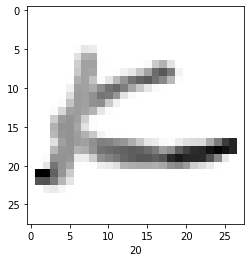

In [6]:
import matplotlib.pyplot as plt
i = 8
plt.imshow(train_images[i],cmap = plt.cm.binary)
plt.xlabel(train_labels[i])
plt.show()

In [7]:
# specify the arguments
rotation_range_val = 30
width_shift_val = 0.10
height_shift_val = 0.10

In [8]:
# create the class object
train_datagen = ImageDataGenerator(rotation_range = rotation_range_val,
                             width_shift_range = width_shift_val,
                             height_shift_range = height_shift_val)

In [9]:
# fit the generator
train_datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))

In [10]:
# define number of rows & columns
num_row = 4
num_col = 8
num= num_row*num_col

BEFORE:



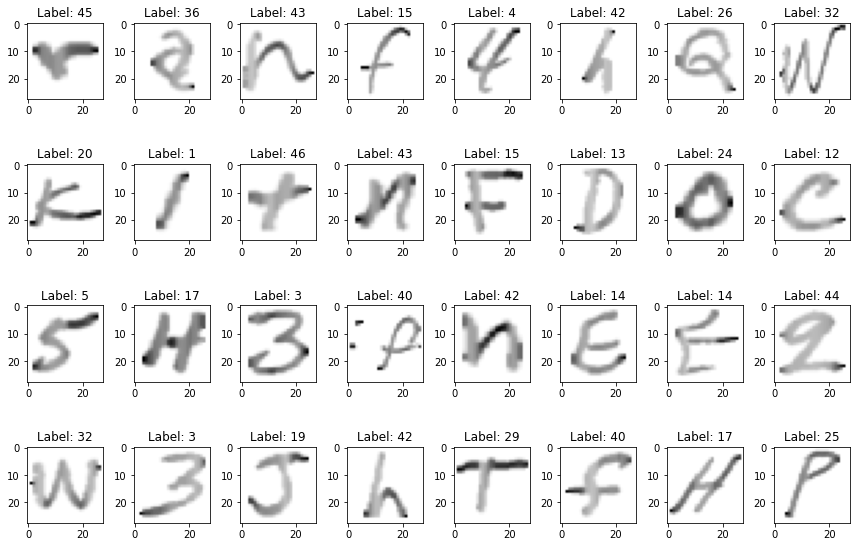

In [11]:
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(train_images[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

AFTER:



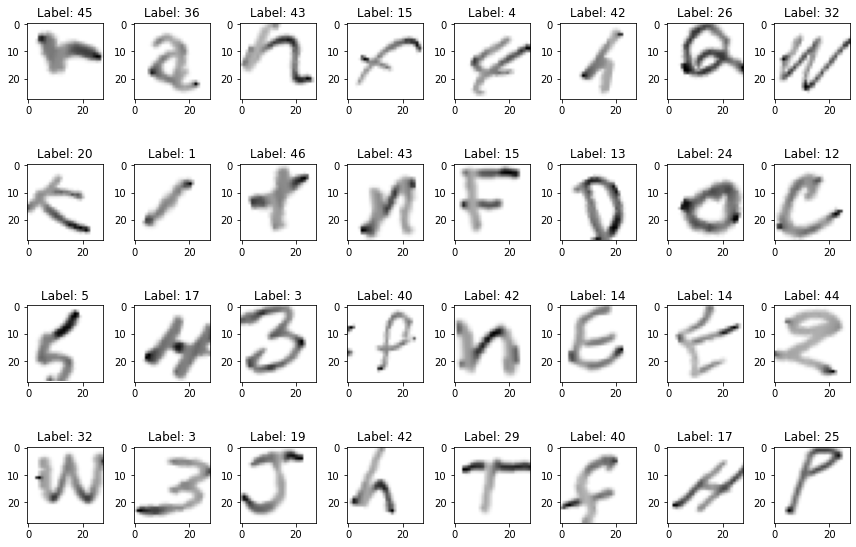

In [12]:
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in train_datagen.flow(train_images.reshape(train_images.shape[0], 28, 28, 1),train_labels.reshape(train_labels.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [13]:
val_datagen = ImageDataGenerator()
val_datagen.fit(test_images.reshape(test_images.shape[0], 28, 28, 1))
val_datagen

## Creating the Model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(62, activation = 'softmax')
])

Metal device set to: Apple M1


2022-02-20 19:42:30.488484: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-20 19:42:30.488567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=256),
         validation_data= val_datagen.flow(test_images, test_labels,
         batch_size=32), epochs= 20)

2022-02-20 19:42:30.641517: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-02-20 19:42:30.781870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


440/441 [============================>.] - ETA: 0s - loss: 1.7544 - accuracy: 0.5025

2022-02-20 19:42:40.896705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


441/441 [==============================] - 13s 28ms/step - loss: 1.7524 - accuracy: 0.5030 - val_loss: 0.6208 - val_accuracy: 0.7961
Epoch 2/20
441/441 [==============================] - 12s 28ms/step - loss: 0.8129 - accuracy: 0.7356 - val_loss: 0.5056 - val_accuracy: 0.8305
Epoch 3/20
441/441 [==============================] - 12s 28ms/step - loss: 0.6648 - accuracy: 0.7801 - val_loss: 0.4634 - val_accuracy: 0.8405
Epoch 4/20
441/441 [==============================] - 12s 28ms/step - loss: 0.5922 - accuracy: 0.7991 - val_loss: 0.4286 - val_accuracy: 0.8511
Epoch 5/20
441/441 [==============================] - 12s 28ms/step - loss: 0.5495 - accuracy: 0.8137 - val_loss: 0.4177 - val_accuracy: 0.8565
Epoch 6/20
441/441 [==============================] - 12s 28ms/step - loss: 0.5192 - accuracy: 0.8216 - val_loss: 0.4050 - val_accuracy: 0.8586
Epoch 7/20
441/441 [==============================] - 12s 28ms/step - loss: 0.4902 - accuracy: 0.8286 - val_loss: 0.3812 - val_accuracy: 0.8666
Epo

In [18]:
scores = model.evaluate(test_images,test_labels)

 21/588 [>.............................] - ETA: 2s - loss: 0.3878 - accuracy: 0.8750

2022-02-20 19:46:37.332051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


588/588 [==============================] - 3s 5ms/step - loss: 0.3376 - accuracy: 0.8770


In [19]:
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 87.70%


## Creating the Model History Graphs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


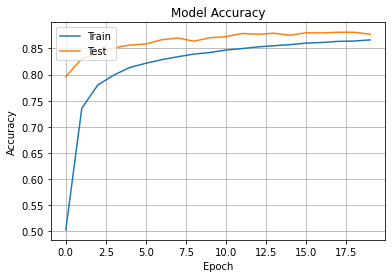

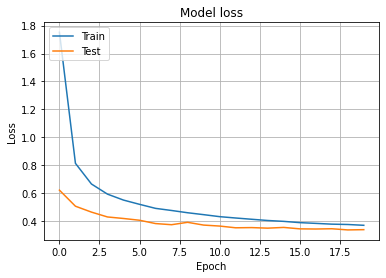

In [20]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

## Saving the Model

In [21]:
model.save("/Users/puravgupta/Jupyter Notebooks/EMNIST Saved Model")

2022-02-20 19:48:35.493366: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/puravgupta/Jupyter Notebooks/EMNIST Saved Model/assets
